# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

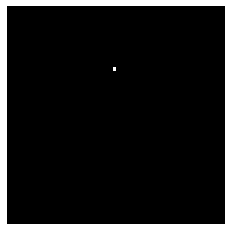

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()
    axes[1].set_aspect('equal')

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    

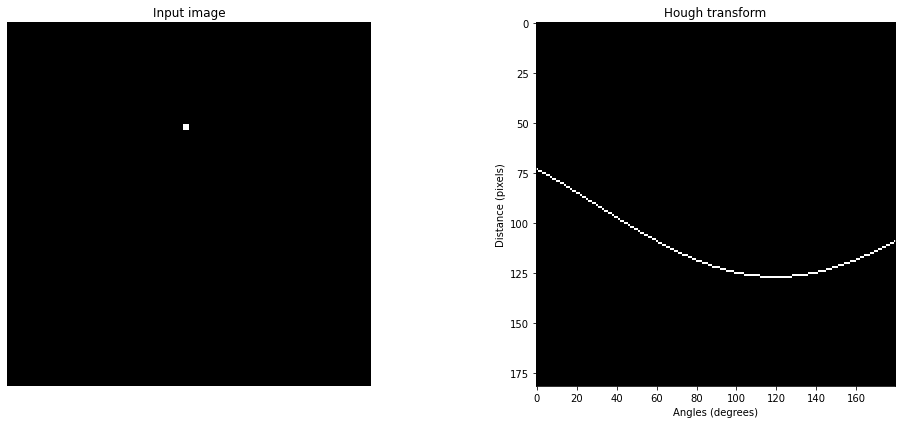

In [3]:
(a, b, c) = hough_line(im, theta=None)  

show_hough(a, im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

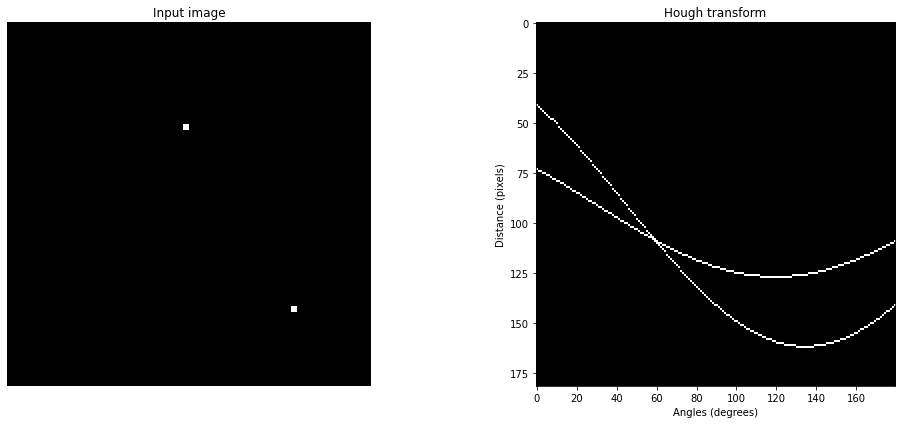

In [4]:
im2 = np.zeros((64,64), dtype=np.uint8)
im2[18, 31] = 1
im2[50, 50] = 1

(a2,b2,c2) = hough_line(im2, theta=None)  

show_hough(a2, im2)

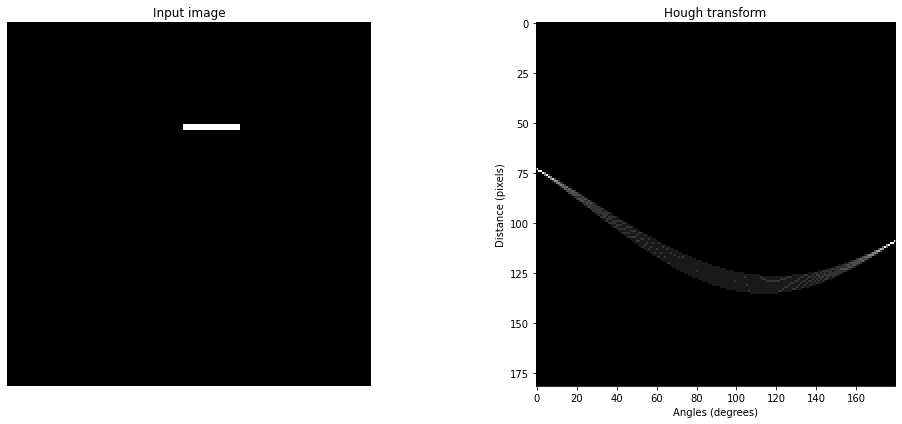

In [5]:
im3 = np.zeros((64,64), dtype=np.uint8)
im3[18, 31:41] = 1


(a3,b3,c3) = hough_line(im3, theta=None)  

show_hough(a3, im3)

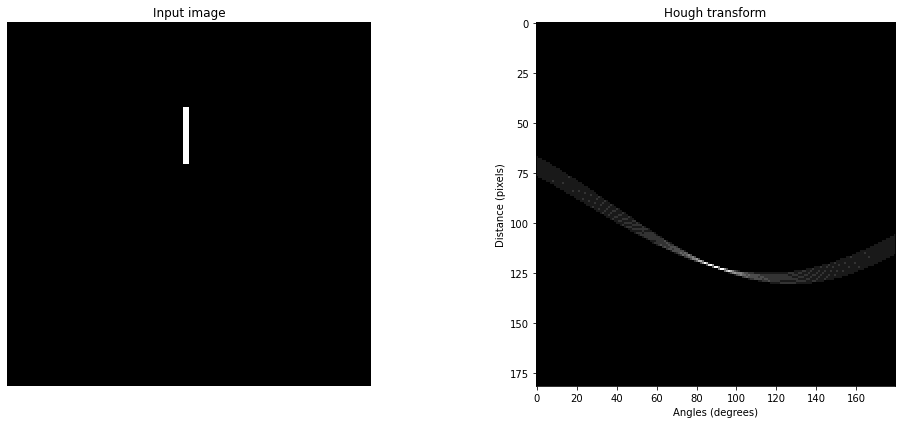

In [6]:
im4 = np.zeros((64,64), dtype=np.uint8)
im4[15:25, 31] = 1


(a4,b4,c4) = hough_line(im4, theta=None)  

show_hough(a4, im4)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

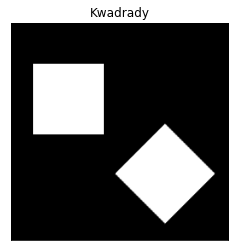

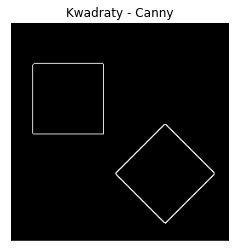

In [7]:
Isqr = cv2.imread('kwadraty.png', cv2.IMREAD_GRAYSCALE)
Isqr_canny = cv2.Canny(Isqr, 50, 150,apertureSize = 3)
plt.imshow(Isqr, 'gray')
plt.title("Kwadrady")
plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(Isqr_canny, 'gray')
plt.title("Kwadraty - Canny")
plt.xticks([]), plt.yticks([])
plt.show()

(726, 180)
(180,)
(726,)


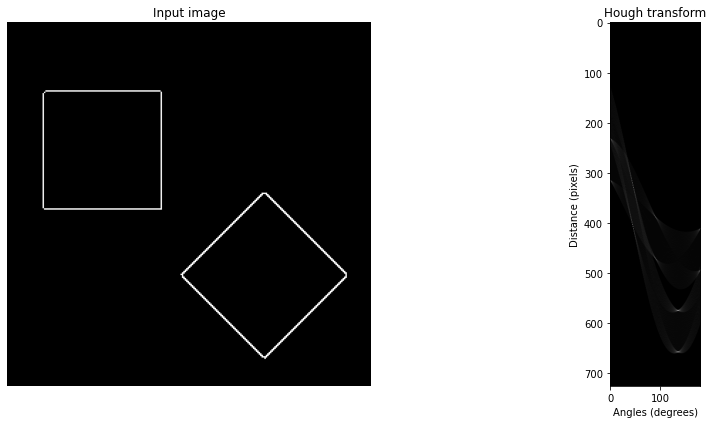

In [8]:
(a,b,c) = hough_line(Isqr_canny) 

print(a.shape)
print(b.shape)
print(c.shape)

show_hough(a, Isqr_canny)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

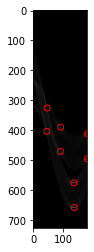

In [9]:
(a,b,c) = hough_line(Isqr_canny, theta=None) 
hspace, angles, dists = hough_line_peaks(a,b,c)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(a, 'gray') # gdzie H jest przestrzenią Hougha

for i in range(len(angles)):
    x = (angles[i]+np.pi/2)*180/np.pi
    y = dists[i] + a.shape[0]/2
    circle = plt.Circle((x, y), 10, color='r', fill=False)
    ax.add_patch(circle)
    



Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

In [10]:
# a = np.cos(theta)
# b = np.sin(theta)
# x0 = a*rho
# y0 = b*rho
# x1 = int(x0 + 1000*(-b))
# y1 = int(y0 + 1000*(a))
# x2 = int(x0 - 1000*(-b))
# y2 = int(y0 - 1000*(a))  

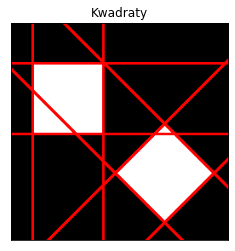

In [11]:
img = cv2.imread('kwadraty.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/4,50)
for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(255,0,0),2)

plt.imshow(img)
plt.title("Kwadraty")
plt.xticks([]), plt.yticks([])
plt.show()

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

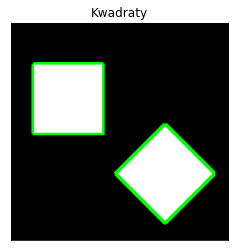

In [12]:
img = cv2.imread('kwadraty.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/4,50,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.title("Kwadraty")
plt.xticks([]), plt.yticks([])
plt.show()

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

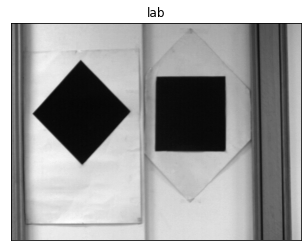

In [13]:
lab = cv2.imread('lab112.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lab, 'gray')
plt.title("lab")
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
def bina(im, lvl = 90):
    im2 = np.greater(im, lvl)
    im2 = im2.astype('uint8')
    im2 *= 255
    return im2

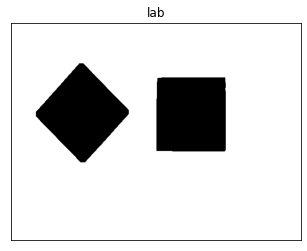

In [15]:
lab_close = cv2.morphologyEx(lab, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(10,10)))

lab_final = bina(lab_close, 50)

plt.imshow(lab_final, 'gray')
plt.title("lab")
plt.xticks([]), plt.yticks([])
plt.show()

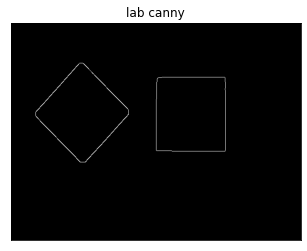

In [16]:
lab_canny = cv2.Canny(lab_final, 50, 150,apertureSize = 3)
plt.imshow(lab_canny, 'gray')
plt.title("lab canny")
plt.xticks([]), plt.yticks([])
plt.show()

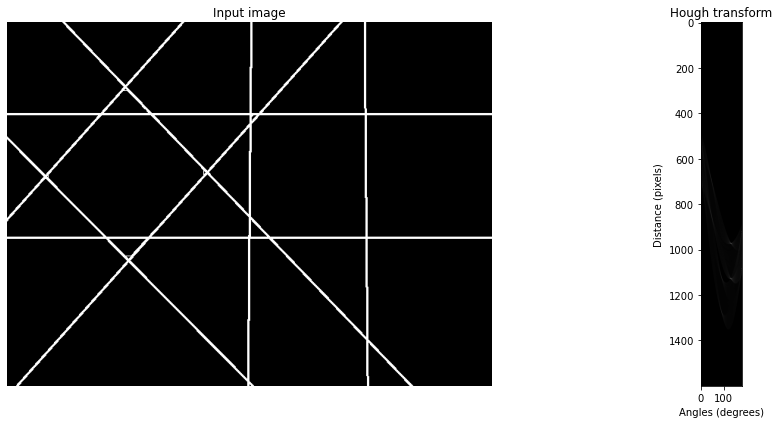

In [17]:
(aa,bb,cc) = hough_line(lab_canny)


hspace, angles, dists = hough_line_peaks(aa,bb,cc)

for i in range(len(angles)):
    rho = dists[i]
    theta = angles[i]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(lab_canny,(x1,y1),(x2,y2),(255,0,0),2)
    
show_hough(aa, lab_canny)

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

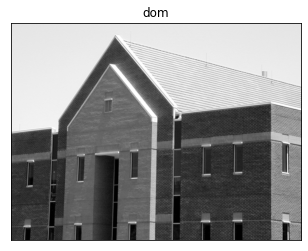

In [18]:
dom = cv2.imread('dom.png')
plt.imshow(dom)
plt.title("dom")
plt.xticks([]), plt.yticks([])
plt.show()

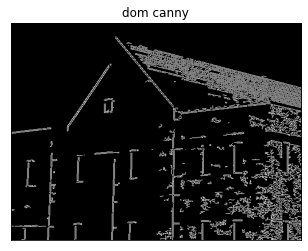

In [19]:
dom2 = cv2.morphologyEx(dom, cv2.MORPH_TOPHAT, np.ones((3,3)))
dom_canny = cv2.Canny(dom2, 50, 150,apertureSize = 3)
plt.imshow(dom_canny, 'gray')
plt.title("dom canny")
plt.xticks([]), plt.yticks([])
plt.show()

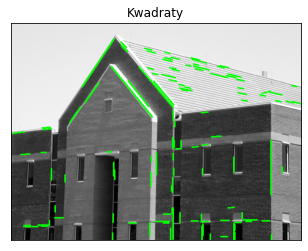

In [20]:
img = dom.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 50
maxLineGap =10
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.title("Kwadraty")
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
def crossing(LoG, thr, kSize):

    res = LoG.copy()
    
    x,y = LoG.shape
    
    for i in range(1, x-1):
        for j in range(1, y-1):
            ctx = LoG[i-1:i+2,j-1:j+2]
            ctxMin = np.min(ctx)
            ctxMax = np.max(ctx)
            if ctxMin * ctxMax < 0:
                if LoG[i][j] > 0:
                    res[i][j] = LoG[i][j] + np.abs(ctxMin)
                else:
                    res[i][j] = np.abs(LoG[i][j]) + ctxMax
    res = (res/np.max(res)) * 255
    res2 = ((res > thr) * 255).astype('uint8')
    return cv2.medianBlur(res2, kSize)

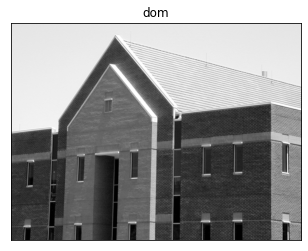

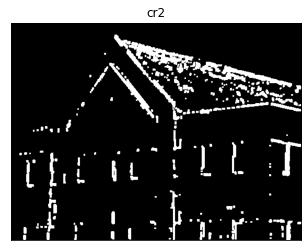

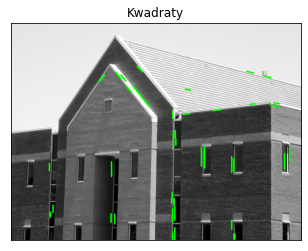

In [22]:
dom = cv2.imread('dom.png')
plt.imshow(dom)
plt.title("dom")
plt.xticks([]), plt.yticks([])
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


houseBlur = cv2.GaussianBlur(gray, (3,3), 0.9)

LoG = cv2.Laplacian(houseBlur, cv2.CV_32F)

cr2 = crossing(LoG, 85,3)

kernel = np.array([[0,1,0],
                   [0,1,0],
                   [0,1,0]]).astype("uint8")

cr2 = cv2.dilate(cr2, kernel)

kernel = np.array([[0,0,0],
                   [1,1,1],
                   [0,0,0]]).astype("uint8")

cr2 = cv2.dilate(cr2, kernel)



plt.imshow(cr2, 'gray')
plt.title("cr2")
plt.xticks([]), plt.yticks([])
plt.show()

img = dom.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(cr2,50,150,apertureSize = 3)
minLineLength = 50
maxLineGap =10
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.title("Kwadraty")
plt.xticks([]), plt.yticks([])
plt.show()

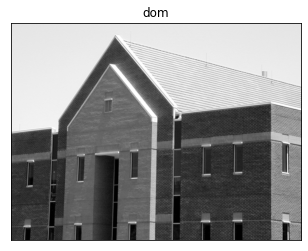

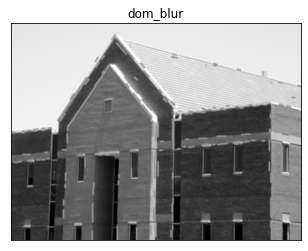

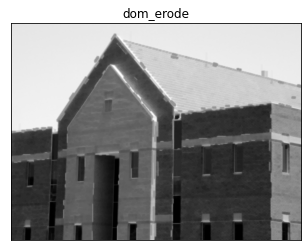

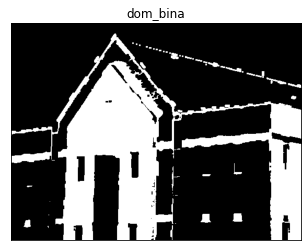

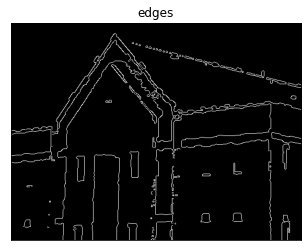

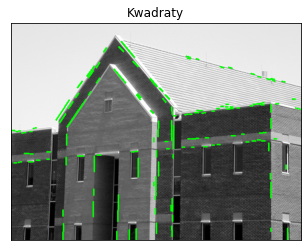

In [54]:
dom = cv2.imread('dom.png')
plt.imshow(dom)
plt.title("dom")
plt.xticks([]), plt.yticks([])
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

dom_blur = cv2.GaussianBlur(gray, (3,3), 0.9)

plt.imshow(dom_blur,'gray')
plt.title("dom_blur")
plt.xticks([]), plt.yticks([])
plt.show()

dom_erode = cv2.erode(dom_blur, cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)))


plt.imshow(dom_erode,'gray')
plt.title("dom_erode")
plt.xticks([]), plt.yticks([])
plt.show()


dom_bina = (dom_erode>=75) & (dom_erode<= 185)
dom_bina = (dom_bina * 255).astype('uint8')

plt.imshow(dom_bina, 'gray')
plt.title("dom_bina")
plt.xticks([]), plt.yticks([])
plt.show()

img = dom.copy()
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(dom_bina,50,150,apertureSize = 3)

plt.imshow(edges, 'gray')
plt.title("edges")
plt.xticks([]), plt.yticks([])
plt.show()



minLineLength = 40
maxLineGap =5
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap)
for i in range(len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(img)
plt.title("Kwadraty")
plt.xticks([]), plt.yticks([])
plt.show()